# T/UDOM/2017/11414

# PREDICTING STUDENT DROP OUT OR NOT

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1.  DATA EXPLORATION

In [2]:
std=pd.read_csv("train_data_week_1_challenge.csv")
std2=pd.read_csv("test_data_week_1_challenge.csv")
std.head(8)

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,continue,s01746,M,BC,0.666,0.468,0.666,7,6,other,True,305,354,86.0,1986.0
1,continue,s16986,M,BC,0.172,0.420,0.172,8,10,mother,False,331,516,15.0,1996.0
2,continue,s00147,F,BC,0.212,0.601,0.212,1,4,mother,False,311,209,14.0,1976.0
3,continue,s08104,F,ST,0.434,0.611,0.434,2,5,father,True,364,147,28.0,1911.0
4,continue,s11132,F,SC,0.283,0.478,0.283,1,10,mother,True,394,122,15.0,1889.0
5,continue,s18221,M,BC,0.462,0.450,0.462,0,10,father,True,382,470,71.0,1896.0
6,continue,s00031,F,BC,0.779,0.701,0.779,4,2,mother,True,338,145,2.0,1929.0
7,continue,s18731,F,SC,0.566,0.495,0.566,0,4,father,True,348,80,14.0,1871.0


Datasets Column

In [3]:
#printing train_set columns
std.columns

Index(['continue_drop', 'student_id', 'gender', 'caste', 'mathematics_marks',
       'english_marks', 'science_marks', 'science_teacher',
       'languages_teacher', 'guardian', 'internet', 'school_id',
       'total_students', 'total_toilets', 'establishment_year'],
      dtype='object')

Dataset Dimension

In [4]:
print(std.shape)
print(std2.shape)

(17190, 15)
(1910, 14)


In [6]:
len(std)

17190

# 2. DATA CLEANING

In [7]:
std.isnull().sum()
print(std.dropna(inplace=True))
print(std.isnull().sum())

None
continue_drop         0
student_id            0
gender                0
caste                 0
mathematics_marks     0
english_marks         0
science_marks         0
science_teacher       0
languages_teacher     0
guardian              0
internet              0
school_id             0
total_students        0
total_toilets         0
establishment_year    0
dtype: int64


In [8]:
#printing different values of different column and how many they are
std['internet'].value_counts()
std['guardian'].value_counts()
std['gender'].value_counts()
std['caste'].value_counts()
std['continue_drop'].value_counts()


continue    16079
drop          799
Name: continue_drop, dtype: int64

Converting categorical data into numeric

In [32]:
std2 = std2.applymap(lambda x: 1 if x == True else x)
std2 = std2.applymap(lambda x: 0 if x == False else x)
std2['gender'] = [1 if x == 'M' else 0 for x in std2['gender']]

In [33]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
guardian = lb.fit_transform(std2['guardian'])
std2['guardian'] = guardian

In [34]:
lb1 = LabelEncoder()
caste = lb1.fit_transform(std2['caste'])
std2['caste'] = caste

In [35]:
std2.drop('student_id', axis=1,inplace=True)
std2.head(4)

,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,0,0,0.212,0.601,0.212,1,4,2,0,341,430,44.0,1959.0
1,0,0,0.511,0.551,0.511,1,5,2,1,329,275,60.0,1914.0
2,1,0,0.890,0.644,0.890,2,2,2,1,390,140,14.0,1972.0
3,0,0,0.355,0.373,0.355,7,4,2,1,336,206,17.0,1940.0


In [37]:
std2.dropna(inplace=True)
std2.isnull().sum()

gender                0
caste                 0
mathematics_marks     0
english_marks         0
science_marks         0
science_teacher       0
languages_teacher     0
guardian              0
internet              0
school_id             0
total_students        0
total_toilets         0
establishment_year    0
dtype: int64

In [9]:
std = std.applymap(lambda x: 1 if x == True else x)
std = std.applymap(lambda x: 0 if x == False else x)
std['continue_drop'] = [1 if x == 'continue' else 0 for x in std['continue_drop']]
std['gender'] = [1 if x == 'M' else 0 for x in std['gender']]


In [10]:
from sklearn.preprocessing import LabelEncoder
lb2 = LabelEncoder()
caste = lb2.fit_transform(std['caste'])
std['caste'] = caste
lb3 = LabelEncoder()
guardian = lb3.fit_transform(std['guardian'])
std['guardian'] = guardian

In [11]:
std.head(10)

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,1,s01746,1,0,0.666,0.468,0.666,7,6,3,1,305,354,86.0,1986.0
1,1,s16986,1,0,0.172,0.420,0.172,8,10,2,0,331,516,15.0,1996.0
2,1,s00147,0,0,0.212,0.601,0.212,1,4,2,0,311,209,14.0,1976.0
3,1,s08104,0,3,0.434,0.611,0.434,2,5,0,1,364,147,28.0,1911.0
4,1,s11132,0,2,0.283,0.478,0.283,1,10,2,1,394,122,15.0,1889.0
5,1,s18221,1,0,0.462,0.450,0.462,0,10,0,1,382,470,71.0,1896.0
6,1,s00031,0,0,0.779,0.701,0.779,4,2,2,1,338,145,2.0,1929.0
7,1,s18731,0,2,0.566,0.495,0.566,0,4,0,1,348,80,14.0,1871.0
8,1,s02140,1,0,0.966,0.806,0.966,4,10,2,1,385,193,2.0,1989.0
9,1,s12350,0,0,0.646,0.804,0.646,8,0,2,1,387,113,4.0,2014.0


In [12]:
std.drop('student_id', axis=1,inplace=True)
std.head(4)

,continue_drop,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,1,1,0,0.666,0.468,0.666,7,6,3,1,305,354,86.0,1986.0
1,1,1,0,0.172,0.420,0.172,8,10,2,0,331,516,15.0,1996.0
2,1,0,0,0.212,0.601,0.212,1,4,2,0,311,209,14.0,1976.0
3,1,0,3,0.434,0.611,0.434,2,5,0,1,364,147,28.0,1911.0


# DATA VISUALIZATION

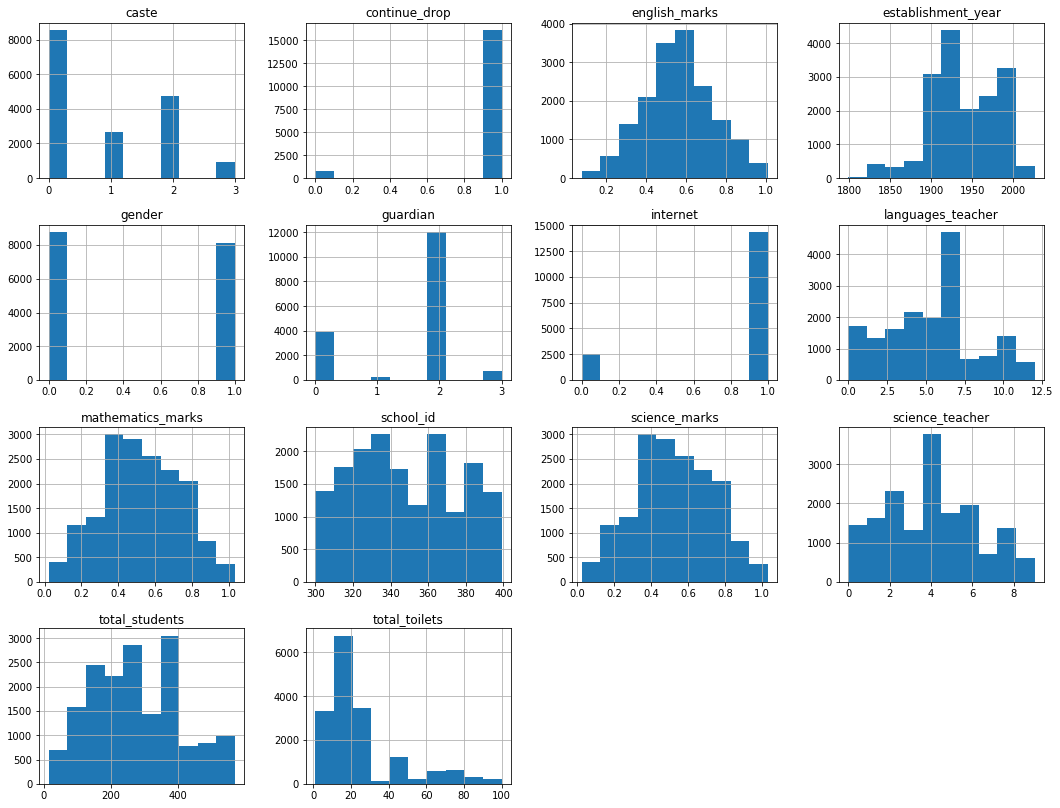

In [13]:
#implement visulization by histogram
std.hist(figsize=(18,14));

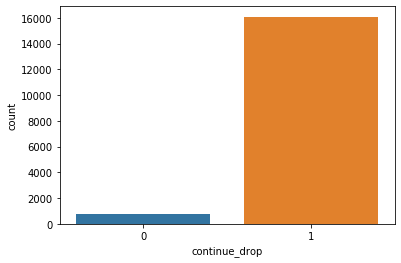

In [14]:
## displaying data relationships
sns.countplot(x='continue_drop', data=std)

# Relationship between target and each feature(two dimensional relationship)

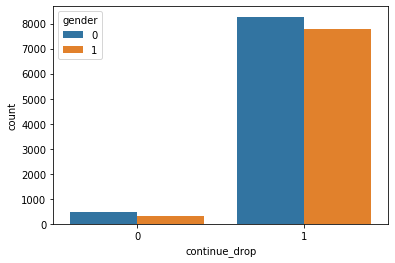

In [15]:
#Relationship between continue_drop and gender
sns.countplot(x='continue_drop', hue='gender', data=std)

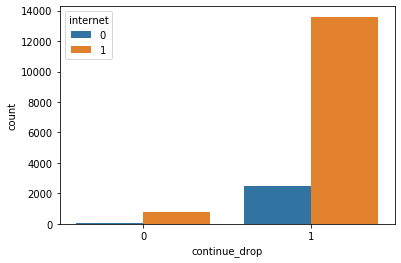

In [16]:
#Relationship between continue_drop and internet
sns.countplot(x='continue_drop', hue='internet', data=std)

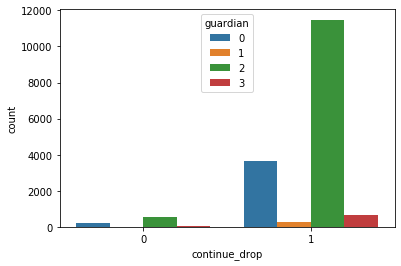

In [17]:
#Relationship between continue_drop and mother
sns.countplot(x='continue_drop', hue='guardian', data=std)

In [18]:
features=['gender','caste','mathematics_marks','english_marks', 'science_marks', 'science_teacher','languages_teacher', 'guardian', 'internet', 'school_id','total_students', 'total_toilets', 'establishment_year']
target=['continue_drop']
#storing features and target in X and y
X=std[features]
y=std[target]
print(X.shape,y.shape)

(16878, 13) (16878, 1)


Text(0, 0.5, 'Frequency')

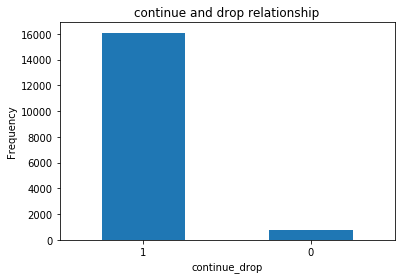

In [19]:
count_classes = pd.value_counts(std['continue_drop'],sort=True)
count_classes.plot(kind = 'bar', rot=0)
plt.title('continue and drop relationship')
plt.xlabel('continue_drop')
plt.ylabel('Frequency')

In [20]:
continues= std[std['continue_drop']==1]
drop = std[std['continue_drop']==0]
print(continues.shape,drop.shape)

(16079, 14) (799, 14)


# DATA TRAINING

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

# 3. MODEL SELECTION

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import f1_score

In [23]:
model = []

model.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
model.append(('KNN', KNeighborsClassifier()))
model.append(('DT', DecisionTreeClassifier()))
model.append(('RF', RandomForestClassifier(n_estimators=100)))
model.append(('SVC', SVC(gamma='scale')))
model.append(('GB', GradientBoostingClassifier()))
model.append(('GNB', GaussianNB()))

# PERFORMING DATA BALANCING

## What is data Imbalance

Data imbalance is a situation which occurs when there is an unequal repressentaion of the classes.If you have been working on classification problems for some time, there is a very high chance that you already encountered data with imbalanced classes.

## why doing data balancing

i.) To removes bias prediction

ii.) Data balancing removes overfitting and underfitting

## How to do data balancing

Data balancing is done through the following ways,

i.)  increasing minorities

ii.) increasing majorities

iii.) Or performing both of above two strategies

##What data do we balance

Data balancing is done to classification dataset so as to achieve equal distribution of classes.

##Method used to balance data

the following are the methods used to perform data balancing.the possible options in the following sections.

Oversampling


In oversampling we create additional data for the minority class either by making duplicates from the minority class or by some method to make additional synthetic data that is representative of the minority class.


Undersampling


In undersampling we remove data for the majority class either randomly or by some method to choose the most ‘appropriate’ points to remove.


Random undersampling


In undersampling we simply choose random data points from within the majority class and delete them until both classes are the same size.


In [24]:
from imblearn.over_sampling import SMOTE
bal = SMOTE(ratio=0.5)
X_bal,y_bal = bal.fit_sample(X_train,y_train)
print(X_bal.shape,y_bal.shape)
from collections import Counter
print('shape of original dataset: {}'.format(Counter(y)))
print('shape of Resampled dataset: {}'.format(Counter(y_bal)))

(18127, 13) (18127,)
shape of original dataset: Counter({'continue_drop': 1})
shape of Resampled dataset: Counter({1: 12085, 0: 6042})


Using TensorFlow backend.


In [25]:
bal = SMOTE(ratio=0.5)
X_bal,y_bal = bal.fit_sample(X_train,y_train)

names = []
scores = []

for name, mod in model:
    mod.fit(X_bal, y_bal)
    y_pred = mod.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    names.append(name)

outpt = pd.DataFrame({'Model': names, 'Accuracy': scores})
outpt

,Model,Accuracy
0,LR,0.893129
1,KNN,0.898945
2,DT,1.000000
3,RF,1.000000
4,SVC,0.972486
5,GB,0.996383
6,GNB,0.831570


# IMPLEMENTING CROSS VALIDATION

In [27]:
folds = StratifiedKFold(n_splits=10, random_state=42)
names = []
scores = []

for name, mod in model:
    
    score = cross_val_score(mod, X, y, cv=folds, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

outpt = pd.DataFrame({'Model': names, 'Accuracy': scores})
outpt

,Model,Accuracy
0,LR,0.952660
1,KNN,0.950231
2,DT,1.000000
3,RF,1.000000
4,SVC,0.952660
5,GB,0.999763
6,GNB,0.952779


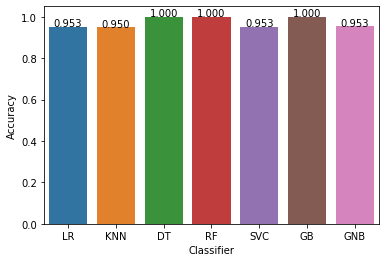

In [30]:
axis = sns.barplot(x ='Model', y ='Accuracy', data = outpt)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.0005, '{:1.3f}'.format(height), ha="center") 
    
plt.show()

In [38]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
tar = gb.predict(std2)
tar

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [39]:
result= pd.Series(tar)
result

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1854    1
1855    1
1856    1
1857    1
1858    1
1859    1
1860    1
1861    1
1862    1
1863    1
1864    1
1865    0
1866    0
1867    1
1868    1
1869    1
1870    1
1871    1
1872    1
1873    1
1874    1
1875    1
1876    1
1877    1
1878    1
1879    1
1880    1
1881    1
1882    1
1883    1
Length: 1884, dtype: int64

# 4. SAVING MODEL

In [40]:
result.to_csv('predicted outcomes.ipynb',index=False)